# PlayerUnknown's BattleGrounds (PUBG) Project

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies
sold, it's the fifth best selling game of all time, and has millions of active monthly players.
The team at PUBG has made official game data available for the public to explore and scavenge outside
of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made
possible through the PUBG Developer API.

You are given over 65,000 games' worth of anonymized player data, split into training and testing sets,
and asked to predict final placement from final in-game stats and initial player ratings.
What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do
you need to be the top shot? Let's let the data do the talking!

# Dataset’s columns Description:

groupId - Integer ID to identify a group within a match. If the same group of players plays in different
matches, they will have a different groupId each time.

matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

DBNOs - Number of enemy players knocked.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)

kills - Number of enemy players killed.

killStreaks - Max number of enemy players killed in a short amount of time.

longestKill - Longest distance between player and player killed at time of death. This may be misleading,
as downing a - player and driving away may lead to a large longestKill stat.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as
sometimes the data skips over placements.

numGroups - Number of groups we have data for in the match.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning
matters.)

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to
1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups,
so it is possible to have missing chunks in a match.


# Tasks to be performed:

1. Read the dataset.

2. Check the datatype of all the columns.

3. Find the summary of all the numerical columns and write your findings about it.

4. The average person kills how many players?

5. 99% of people have how many kills?

6. The most kills ever recorded are how much?

7. Print all the columns of the dataframe.

8. Comment on distribution of the match's duration. Use seaborn.

9. Comment on distribution of the walk distance. Use seaborn.

10. Plot distribution of the match's duration vs walk distance one below the other.

11. Plot distribution of the match's duration vs walk distance side by side.

12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.

13. How many unique values are there in 'matchType' and what are their counts?

14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.

15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.

16. Find the Categorical columns.

17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.

19. Change the orientation of the above plot to horizontal.

20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,
teamKills, roadKills.

21. Round off column ‘winPlacePerc’ to 2 decimals.

22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot
it on a histogram and comment on its distribution.


# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# Tasks
## Read the dataset.

In [2]:
data = pd.read_csv("pubg.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


## Check the datatype of all the columns.

In [3]:
data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

Here we have 19 integer values, 6 float values and 4 object values.

## Find the summary of all the numerical columns and write your findings about it.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,10000.0,0.234600,0.575149,0.0,0.000,0.0000,0.000000,7.0
boosts,10000.0,1.088500,1.703279,0.0,0.000,0.0000,2.000000,18.0
damageDealt,10000.0,129.211264,167.193945,0.0,0.000,83.8050,185.325000,3469.0
DBNOs,10000.0,0.644000,1.095620,0.0,0.000,0.0000,1.000000,11.0
headshotKills,10000.0,0.221700,0.577046,0.0,0.000,0.0000,0.000000,14.0
heals,10000.0,1.354000,2.629102,0.0,0.000,0.0000,2.000000,31.0
killPlace,10000.0,47.663100,27.424146,1.0,24.000,48.0000,71.000000,100.0
killPoints,10000.0,506.970200,627.297959,0.0,0.000,0.0000,1169.000000,1926.0
kills,10000.0,0.913400,1.524117,0.0,0.000,0.0000,1.000000,35.0
killStreaks,10000.0,0.543800,0.701948,0.0,0.000,0.0000,1.000000,4.0


### Inferences

1. There are total 10000 records so each attribute has the same count as 10000.

2. The average assists done by player is 0.23.

3. The average boosts items used by player is 1.

4. The average damage dealth by player is 129.

5. The average heal items used by player is 1.

6. The average kill points of player is 507.

7. The average ride distance by player is 600.

8. The average walking distance by player is 1130.

9. The average win points of player is 609.

10. The maximum assists done by player is 7.

11. The maximum damage dealth by player is 3469.

12. The maximum number of enemy players knocked by player is 11.

13. The maximum headshot kills by player is 14.

14. The maximum kill points by player is 1926.

15. The maximum kills by player is 35.

16. Around 75% players acquire 5 weapons.

17. Around 75% players have dealt damage of 185.

18. Around 50% players have walk distance of 650.


## The average person kills how many players?

Ans- The average person kill at least 1 player.

## 99% of people have how many kills?

In [5]:
print("99% of people have less than or equal to",data['kills'].quantile(0.99),"kills")

99% of people have less than or equal to 7.0 kills


## The most kills ever recorded are how much?

In [6]:
print("The most kills ever recorded are",data['kills'].max())

The most kills ever recorded are 35


## Print all the columns of the dataframe.

In [7]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## Comment on distribution of the match's duration. Use seaborn.

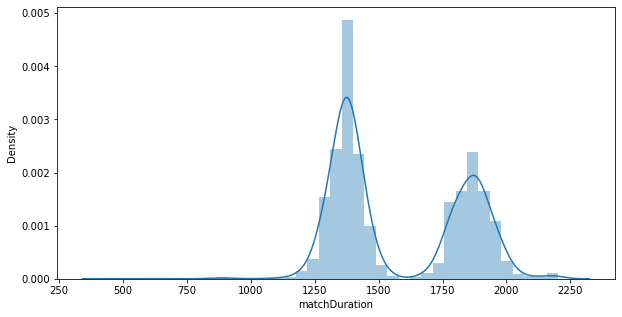

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(data['matchDuration']);

Most of the Match Duration is between - 

1. 1250 to 1450

2. 1750 to 1950

## Comment on distribution of the walk distance. Use seaborn.

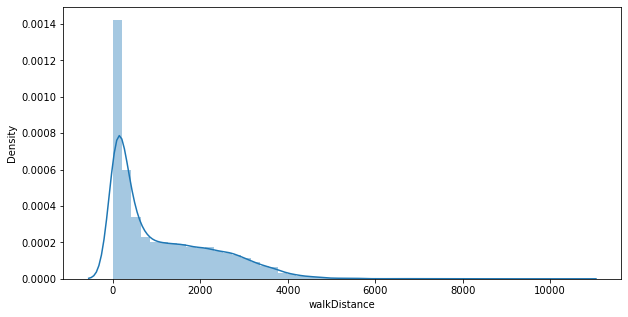

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(data['walkDistance']);

The distribution is positively skewed.
Most of the walk distance is between 0 to 4000

## Plot distribution of the match's duration vs walk distance one below the other.

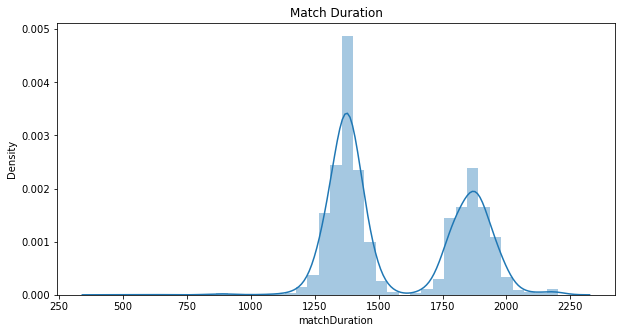

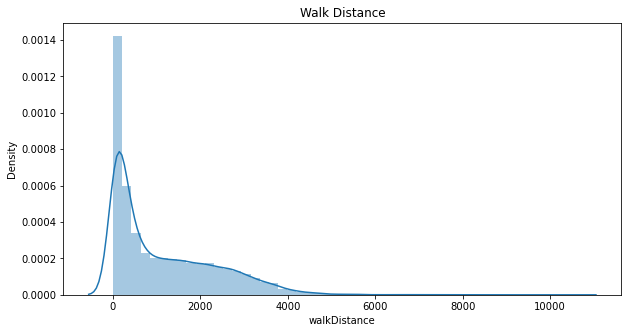

In [10]:
plt.figure(figsize=(10,5))
plt.title("Match Duration")
sns.distplot(data['matchDuration'])

plt.figure(figsize=(10,5))
plt.title("Walk Distance")
sns.distplot(data['walkDistance']);

## Plot distribution of the match's duration vs walk distance side by side.

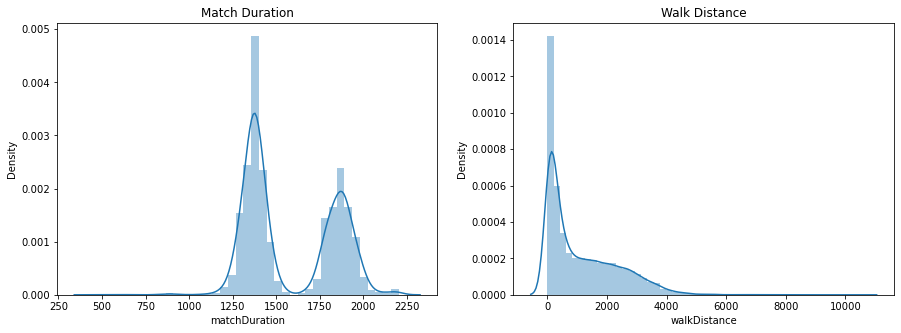

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['matchDuration'])
plt.title("Match Duration")

#plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.distplot(data['walkDistance'])
plt.title("Walk Distance");

## Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.

Here we have lot of data and the pairplot will be too big and it will be difficult to make inferences.

So, we take only the 4 features in the separate dataframe and then plot a pairplot.

In [12]:
data1 = data[["kills","damageDealt","maxPlace","numGroups"]]
data1.head()

,kills,damageDealt,maxPlace,numGroups
0,0,0.0,29,28
1,1,163.2,28,28
2,2,278.7,29,27
3,1,191.9,27,25
4,0,100.0,30,30


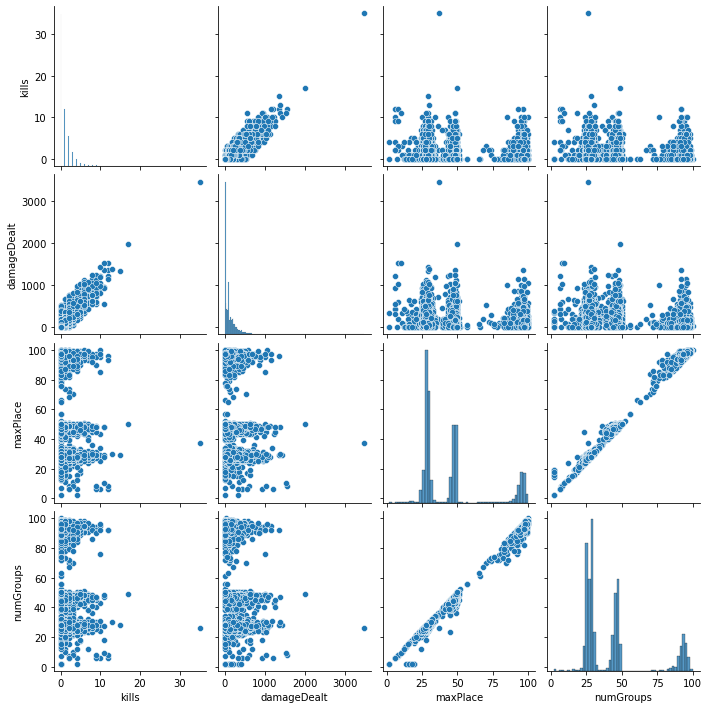

In [13]:
sns.pairplot(data1);

### Inferences

1. kills vs damage dealt - The number of kills increases as the damage dealth increases and vice versa. (i.e Both are directly proportional)

2. maxPlace vs numGroups - The number of groups increases as the max pace increases and vice versa. (i.e Both are directly proportional)

## How many unique values are there in 'matchType' and what are their counts?

In [14]:
print("Unique Values are:",len(data["matchType"].value_counts()))
print("\nThe Count of Unique Values is:\n",data["matchType"].value_counts())

Unique Values are: 14

The Count of Unique Values is:
 squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
normal-duo-fpp        13
crashfpp              13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64


## Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.

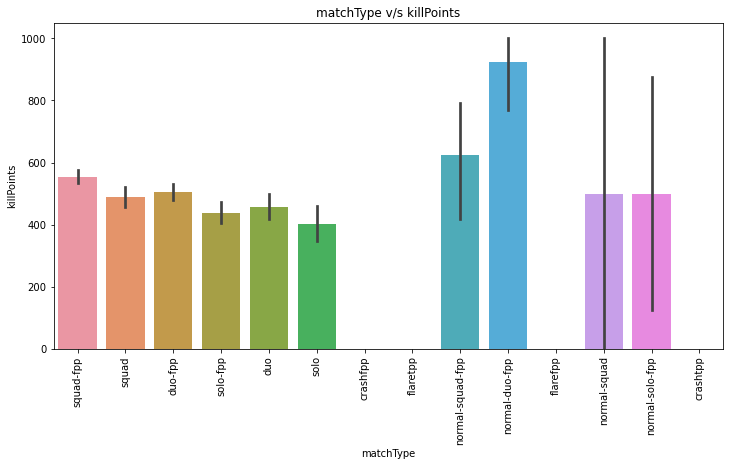

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.title("matchType v/s killPoints")
sns.barplot(x="matchType",y="killPoints",data=data);

### Inferences

1. Match type normal-duo-fpp has the maximum kill points.

2. Match types normal-squad and normal-solo-fpp have same number of kill points.

3. Match types squad-fpp, squad, duo-fp, solo-fpp, duo, solo, normal-squad and normal-solo-fpp have kill points in the range 400 to 600.

4. Match types crashfpp, flaretpp, flarefpp and crashtpp have no kill points.


## Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.

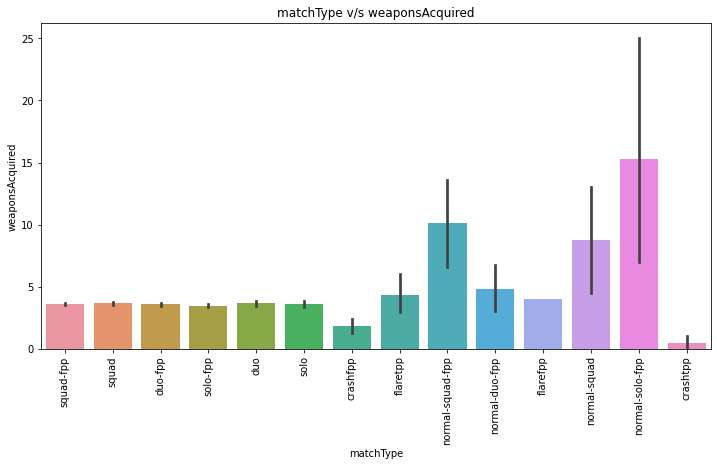

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.title("matchType v/s weaponsAcquired")
sns.barplot(x="matchType",y="weaponsAcquired",data=data);

### Inferences

1. In match type normal-solo-fpp, maximum weapons have been acquired.

2. In match types squad-fpp, squad, duoo-fpp, solo-fpp, duo, solo, crashfpp, flaretpp, normal-duo-fpp, flarefpp and normal-squad, the weapons acquired are in the range of 0 to 10.

3. In match type crashtpp, minimum weapons have been acquired.


In [17]:
data['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
normal-duo-fpp        13
crashfpp              13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

## Find the Categorical columns.

In [18]:
data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

There is only one Categorical Column matchType.

## Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

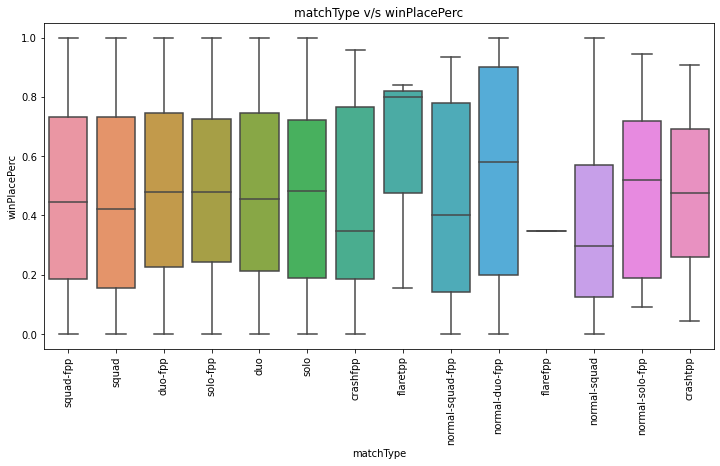

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.title("matchType v/s winPlacePerc")
sns.boxplot(x="matchType",y="winPlacePerc",data=data);

### Inferences

1. The winPlacePerc is highest in the match type normal-duo-fpp.

2. The winPlacePerc is between 40% to 60% in match types squad-fpp, squad, duo-fpp, solo-fpp, duo, solo, normal-solo-fpp and crashtpp.

3. The winPlacePerc is lowest in match type flarefpp, and normal-squad.


In [20]:
data["matchType"].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
normal-duo-fpp        13
crashfpp              13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

## Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.

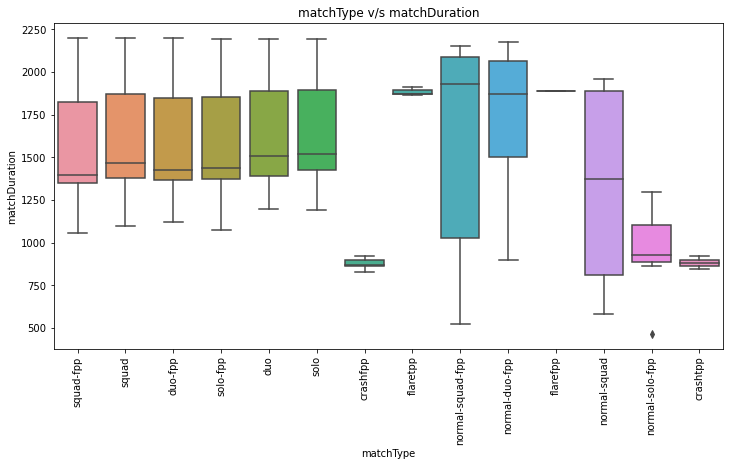

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.title("matchType v/s matchDuration")
sns.boxplot(x="matchType",y="matchDuration",data=data);

### Inferences

1. The match duration is maximun for match types normal-squad-fpp and normal-duo-fpp.

2. The match duration is widely spread in match types normal-squad-fpp and normal-squad.

3. The match duration is minimum for match types crashfpp and crashtpp.


## Change the orientation of the above plot to horizontal.

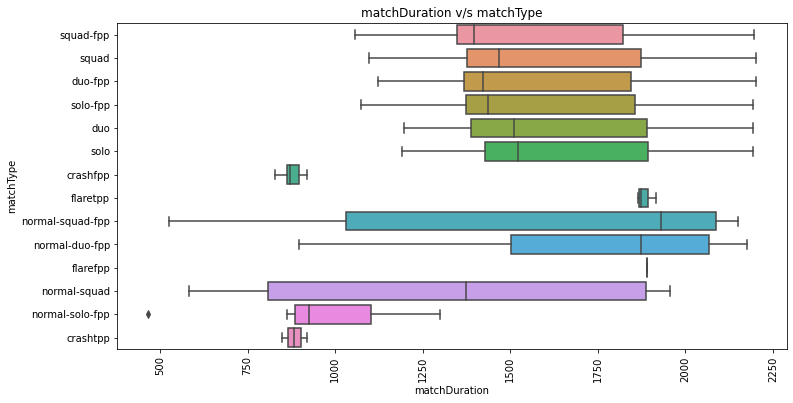

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.title("matchDuration v/s matchType")
sns.boxplot(x="matchDuration",y="matchType",data=data);

## Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills, teamKills, roadKills.

In [23]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [24]:
data["KILL"] = sum([data["headshotKills"], data["teamKills"], data["roadKills"]])
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0.0,0,0.0,0,0,0.0,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0.0,0,0.0,0,0,132.7,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,0.0,0,0.0,0,0,3591.0,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0.0,0,0.0,0,0,332.7,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0.0,0,0.0,0,0,252.7,3,1557,0.0690,0


In [25]:
data["KILL"].value_counts()

0     8119
1     1433
2      336
3       73
4       26
5       11
14       1
6        1
Name: KILL, dtype: int64

## Round off column ‘winPlacePerc’ to 2 decimals.

In [26]:
data["winPlacePerc"] = round(data["winPlacePerc"],ndigits=2)
data["winPlacePerc"]

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64

## Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.

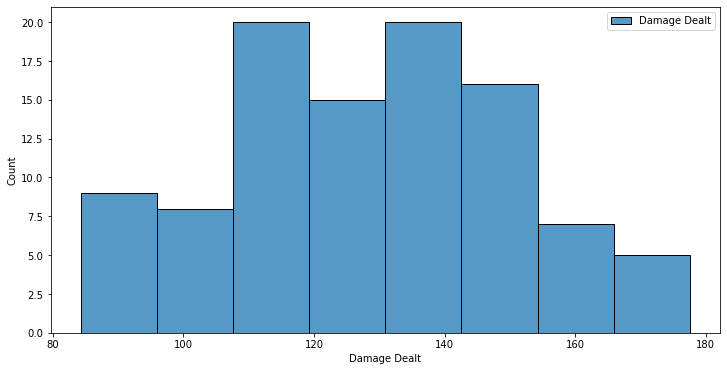

In [27]:
dmg_dealt1 = data["damageDealt"]
dmg_dealt = []

for item in range(0,100):
    temp = dmg_dealt1.sample(50)
    item = temp.mean()
    dmg_dealt.append(item)

plt.figure(figsize=(12,6))
plt.xlabel("Damage Dealt")
sns.histplot(dmg_dealt,label="Damage Dealt")
plt.legend();

### Inferences

1. The maximum damage dealt is distributed between 110 to 155.

2. The highest frequency of damage dealt is from 110 to 120 and from 130 to 145.
